### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic (1).csv


In [ ]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [ ]:
df.shape

(891, 8)

In [ ]:
# No of unique values each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


In [ ]:
# Droping extra columns

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare','Cabin'], axis=1)

In [ ]:
# No of null values - column wise

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Embarked,2


In [ ]:
# Avg age gender and survived wise

df_male_not_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age'].mean().round(2)
df_male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age'].mean().round(2)
df_female_not_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age'].mean().round(2)
df_female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Age'].mean().round(2)

print('Average male age who did not survived', df_male_not_survived)
print('Average male age who survived', df_male_survived)
print('Average female age who did not survived', df_female_not_survived)
print('Average female age who survived', df_female_survived)

Average male age who did not survived 31.62
Average male age who survived 27.28
Average female age who did not survived 25.05
Average female age who survived 28.85


In [ ]:
# Handling missing values - Age column

df_copy = df.copy()

for i in range (df.shape[0]):
  if pd.isna(df['Age'][i]):
  #if df['Age'][i] == np.nan:
    #Sex = df['Sex'][i]
    df.loc[i, "Sex"] = Sex
    #Survived = df['Survived'][i]
    df.loc[i, "Survived"] = Survived
    mean_age = df_copy[(df_copy['Sex'] == Sex) & (df_copy['Survived'] == Survived)]['Age'].mean().round(2)
    #df['Age'][i] = mean_age
    df.loc[i, 'Age'] = mean_age


In [ ]:
# Handling missing values - Embarked column

df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# Replacing nan with 'S'

df.fillna({'Embarked': 'S'}, inplace=True)

In [ ]:
# No of null values colum wise

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


In [ ]:
# No of Unique values column wise

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Survived: 2 unique values
Pclass: 3 unique values
Sex: 2 unique values
Age: 89 unique values
SibSp: 7 unique values
Parch: 7 unique values
Embarked: 3 unique values


In [ ]:
# All Unique values column wise except age column

for col in df.columns:
  if col != 'Age':
    print(f"{col}: {df[col].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


In [ ]:
# Creating Additional 'Age_Group' column based on age ranges

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Senior'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Group
0,0,3,male,22.0,1,0,S,Adult
1,1,1,female,38.0,1,0,C,Adult
2,1,3,female,26.0,0,0,S,Adult
3,1,1,female,35.0,1,0,S,Adult
4,0,3,male,35.0,0,0,S,Adult


### Data Visualization

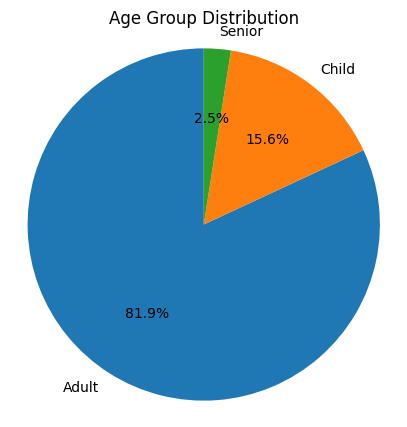

In [ ]:
# Count the occurrences of each age group
age_group_counts = df['Age_Group'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

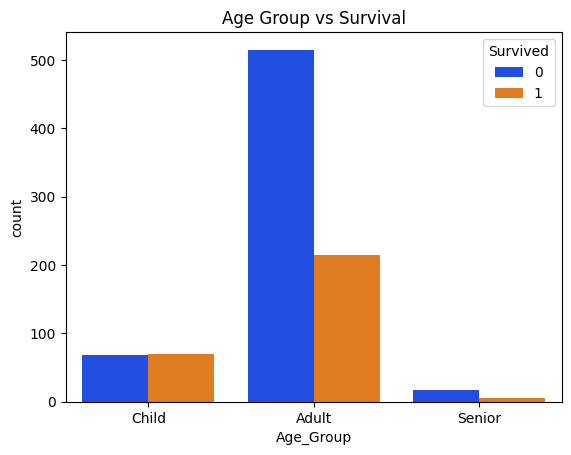

In [ ]:
# Plot age group vs survival rate
sns.countplot(x='Age_Group', hue='Survived', data=df,palette='bright')
plt.title('Age Group vs Survival')
plt.show()

new_labels = {0: 'Not Survived', 1: 'Survived'}
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='bright')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])


handles, labels = plt.gca().get_legend_handles_labels()

new_labels_mapped = [new_labels[int(label)] for label in labels]
plt.legend(handles=handles, title='Survival', labels=new_labels_mapped)
plt.show()

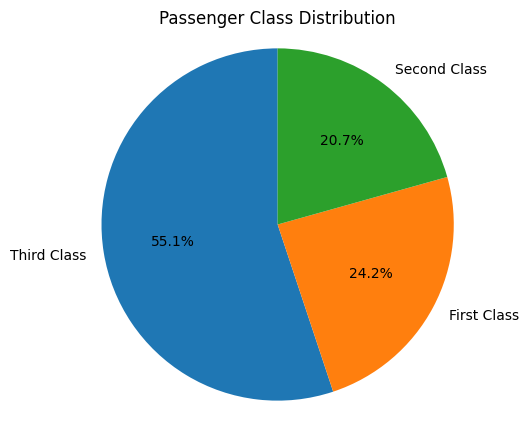

In [ ]:
# Pclass Pie Chart with Class Distribution

pclass_counts = df['Pclass'].value_counts()
labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
plt.figure(figsize=(5, 5))
plt.pie(pclass_counts, labels=[labels[key] for key in pclass_counts.index], autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.axis('equal')
plt.show()

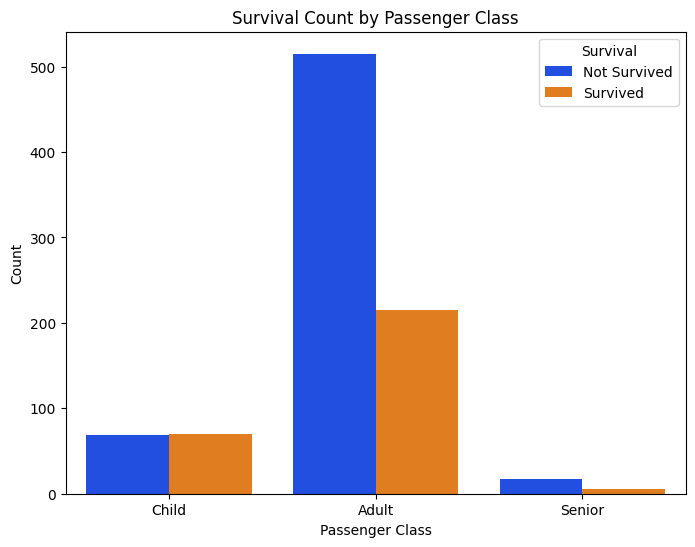

In [ ]:
# Count of Survival by Passenger Class

new_labels = {0: 'Not Survived', 1: 'Survived'}
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Survived', data=df, palette='bright')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')

handles, labels = plt.gca().get_legend_handles_labels()

new_labels_mapped = [new_labels[int(label)] for label in labels]
plt.legend(handles=handles, title='Survival', labels=new_labels_mapped)
plt.show()


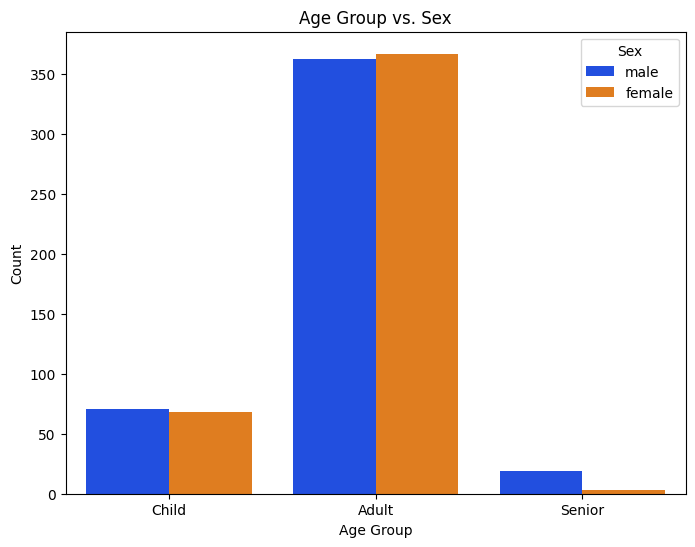

In [ ]:
# Age vs Gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Sex', data=df, palette='bright')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs. Sex')
plt.show()

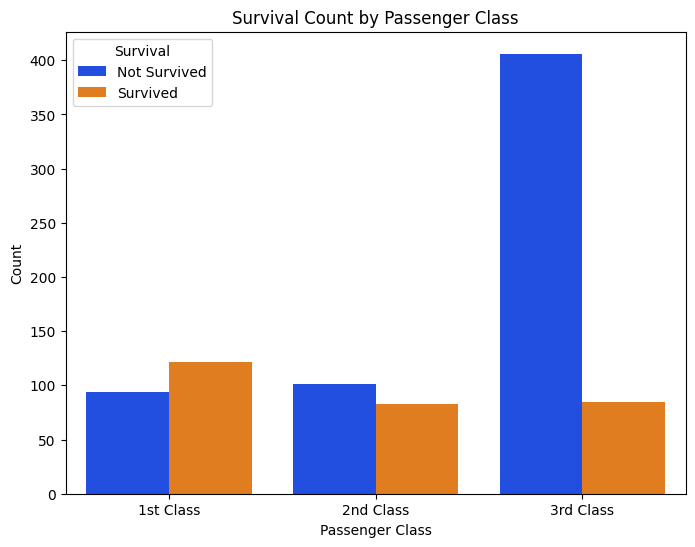

In [ ]:
# Survival by Class

new_labels = {0: 'Not Survived', 1: 'Survived'}
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='bright')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])


handles, labels = plt.gca().get_legend_handles_labels()

new_labels_mapped = [new_labels[int(label)] for label in labels]
plt.legend(handles=handles, title='Survival', labels=new_labels_mapped)
plt.show()


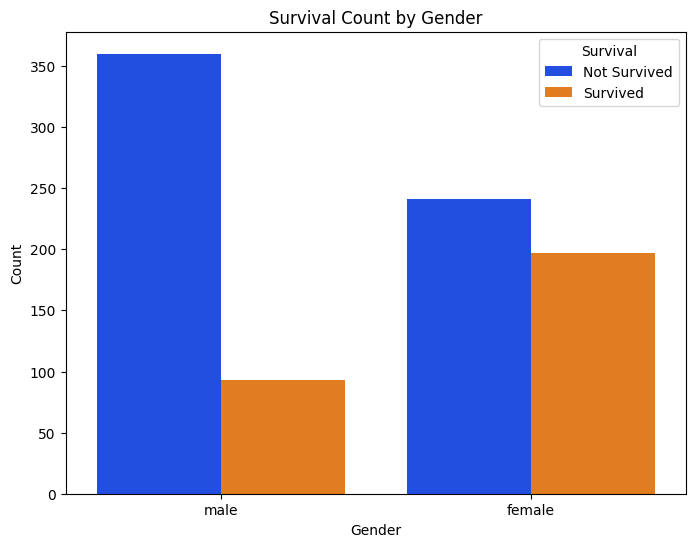

In [ ]:
# Gender vs Survival

new_labels = {0: 'Not Survived', 1: 'Survived'}
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='bright')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
handles, labels = plt.gca().get_legend_handles_labels()

new_labels_mapped = [new_labels[int(label)] for label in labels]
plt.legend(handles=handles, title='Survival', labels=new_labels_mapped)
plt.show()

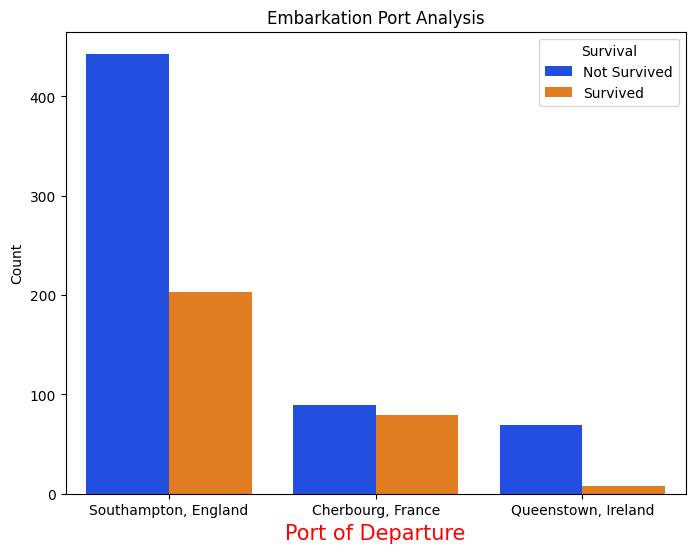

In [ ]:
# Port Analysis

new_labels = {0: 'Not Survived', 1: 'Survived'}
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='bright') #
plt.xlabel('Port of Departure', color='red',fontsize=15)
plt.ylabel('Count')
plt.title('Embarkation Port Analysis')
plt.xticks([0, 1, 2], ['Southampton, England', 'Cherbourg, France', 'Queenstown, Ireland'])

handles, labels = plt.gca().get_legend_handles_labels()

new_labels_mapped = [new_labels[int(label)] for label in labels]
plt.legend(handles=handles, title='Survival', labels=new_labels_mapped)
plt.show()

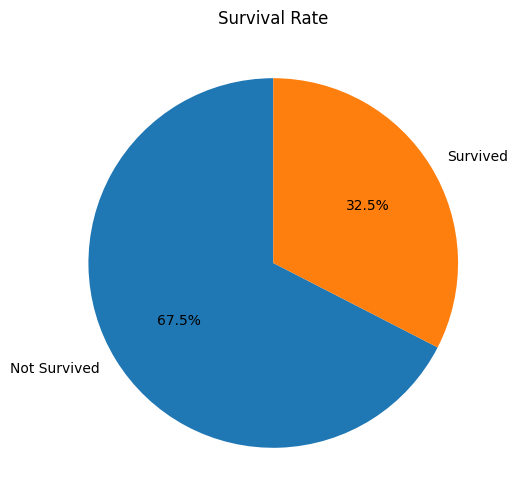

In [ ]:
# Survival pie plot

plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Not Survived', 'Survived'])
plt.title('Survival Rate')
plt.ylabel('')
plt.show()

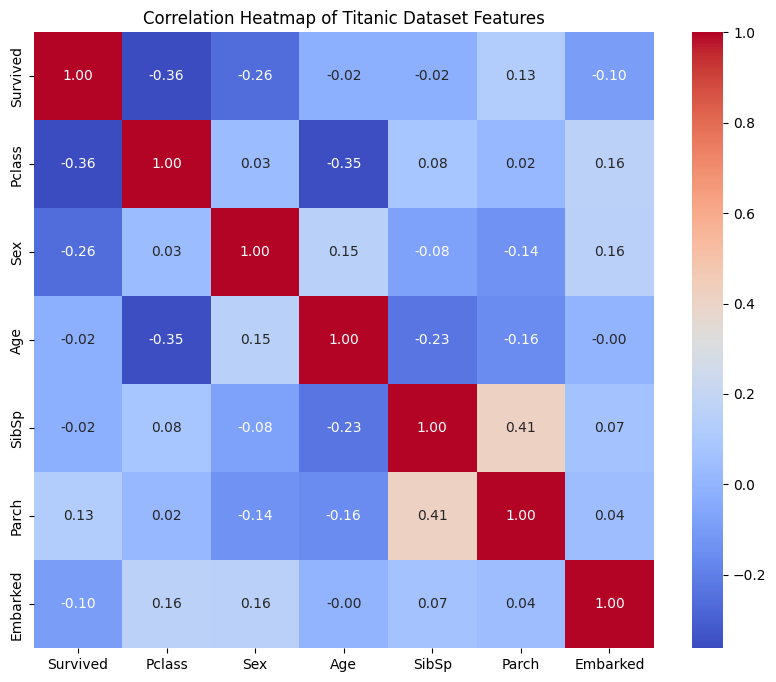

In [ ]:
# Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()

In [ ]:
df.drop('Age_Group', axis=1, inplace=True)

In [ ]:
# Labeling Catagorical Columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [ ]:
# Data Preview
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [ ]:
# Defining Target Variable

x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(712, 6) (179, 6) (712,) (179,)


In [ ]:
# Standardization Numerical Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)


In [ ]:
x_test_transformed

array([[ 0.81303367, -1.0256087 , -0.2727257 ,  0.37992316,  0.78470001,
        -2.02505292],
       [-0.40055118,  0.97503073,  0.18129914, -0.47072241, -0.47934164,
         0.5635246 ],
       [ 0.81303367,  0.97503073, -0.65807451, -0.47072241, -0.47934164,
         0.5635246 ],
       ...,
       [ 0.81303367, -1.0256087 ,  0.715446  ,  0.37992316,  5.8408666 ,
         0.5635246 ],
       [-0.40055118, -1.0256087 , -0.8869946 , -0.47072241, -0.47934164,
         0.5635246 ],
       [ 0.81303367, -1.0256087 , -1.87898164,  0.37992316,  0.78470001,
         0.5635246 ]])

In [ ]:
# Predicting using multiple machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_transformed, y_train)
lr_pred = lr.predict(x_test_transformed)
print("Logistic Regression accuracy:", accuracy_score(y_test, lr_pred))

# SVM
svm = SVC()
svm.fit(x_train_transformed, y_train)
svm_pred = svm.predict(x_test_transformed)
print("SVM accuracy:", accuracy_score(y_test, svm_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_transformed, y_train)
rf_pred = rf.predict(x_test_transformed)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))

# KNN
knn = KNeighborsClassifier()
knn.fit(x_train_transformed, y_train)
knn_pred = knn.predict(x_test_transformed)
print("KNN accuracy:", accuracy_score(y_test, knn_pred))


# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train_transformed, y_train)
dt_pred = dt.predict(x_test_transformed)
print("Decision Tree accuracy:", accuracy_score(y_test, dt_pred))

Logistic Regression accuracy: 0.7597765363128491
SVM accuracy: 0.7821229050279329
Random Forest accuracy: 0.8491620111731844
KNN accuracy: 0.776536312849162
Decision Tree accuracy: 0.8435754189944135


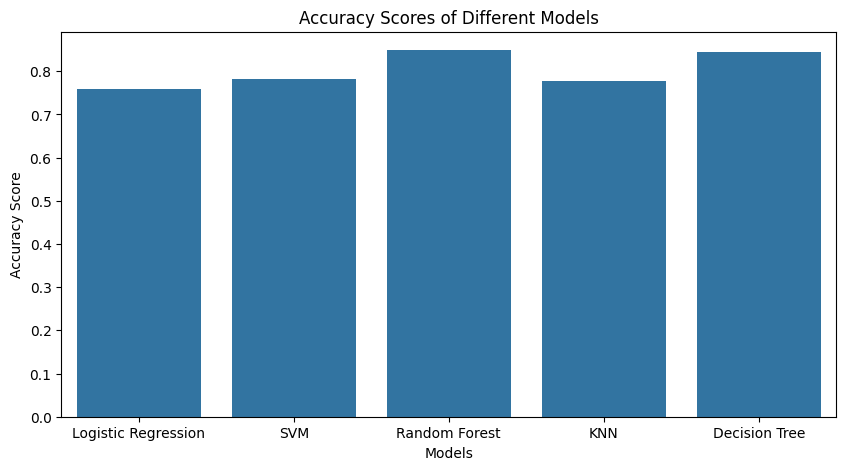

In [ ]:
# Plotting accuracy chart

models = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy_scores)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Models")
plt.show()